<a href="https://colab.research.google.com/github/barauna-lo/Colored_Noise/blob/main/Noise_Generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Noise Generator

# 1 Dimensional Noise

In [2]:
pip install colorednoise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
import colorednoise as cn
from matplotlib import mlab
import pandas as pd
import matplotlib.pyplot as plt


In [15]:
#GENERATING THE COLORED NOISE DATA FRAME
samples = 2**20
# initialize list of lists for diferents betas
data = []
for i in range(0,13): #the range of beta
    for j in range(0,10): 
        beta = round(i/4,2)                          #alocating diferents values of beta
        A = cn.powerlaw_psd_gaussian(beta, samples)  #genereting the amplitude noise
        s, f = mlab.psd(A, NFFT=2**13)               #genereting the power spectrum density
        data.append([beta,A,f,s])                    #allocating the genereted data in a matrix
# Create the pandas DataFrame
df = pd.DataFrame(data, columns = ['beta', 'Series','PSD','Frequency'])

In [16]:
#Saving dataframe as .plk
df.to_pickle('color.plk') 

#Saving dataframe as .csv
#CONVERTING THE DATA FROM THE STRING FORMAT
#df['beta'] = df['beta'].map(lambda x: ','.join(map(str, x)))
df['Series'] = df['Series'].map(lambda x: ','.join(map(str, x)))
df['PSD'] = df['PSD'].map(lambda x: ','.join(map(str, x)))
df['Frequency'] = df['Frequency'].map(lambda x: ','.join(map(str, x)))
#Saving the data 
df.to_csv("color.csv", index=False)

In [20]:
len(df)

130

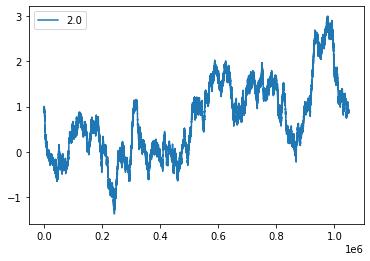

In [19]:
#testing
df = pd.read_pickle('color.plk')
index = 80
plt.plot(df.Series[index][:],label=str(df.beta[index]))
plt.legend()

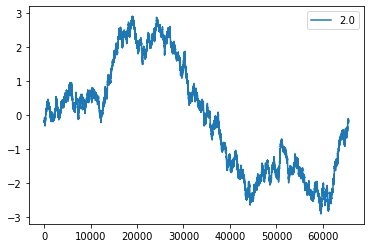

In [9]:
#testing
df = pd.read_csv("color.csv")

#REALOCOTING THE DATA FOR THE FLOAT FORMAT
# dfn['beta'] = dfn['beta'].str.split(',').map(lambda x: list(map(float, x)))
df['Series']    = df['Series'].str.split(',').map(   lambda x: list(map(float, x)))
df['PSD']       = df['PSD'].str.split(',').map(      lambda x: list(map(float, x)))
df['Frequency'] = df['Frequency'].str.split(',').map(lambda x: list(map(float, x)))

index = 80
plt.plot(df.Series[index],label=str(df.beta[index]))
plt.legend()

# 2 Dimensional noise

The code bellow can be acessed in 
https://github.com/barauna-lo/Colored_Noise/blob/main/noise_generator.py

In [10]:
!git clone https://github.com/rsautter/Noisy-Complex-Ginzburg-Landau.git

#For this program run, you need to use cNoise.py code hosted on RubensSauter github
#I strongly recomend that you comment line 116 and 127 for the version of 02/2022

%cd Noisy-Complex-Ginzburg-Landau/
import cNoise as cNoise
%cd ..

Cloning into 'Noisy-Complex-Ginzburg-Landau'...
remote: Enumerating objects: 40, done.
remote: Total 40 (delta 0), reused 0 (delta 0), pack-reused 40
Unpacking objects: 100% (40/40), done.
/content/Noisy-Complex-Ginzburg-Landau
/content


In [11]:
#import the cNoise function
import numpy as np
import pandas as pd
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import cv2

In [ ]:
images_for_classes = 1000
#Generating several colored noise from `cNoise` mudule
#%%capture 
size = 128
noise = []
beta  = []
for j in range(0,images_for_classes):
  for i in range(0,15):
    noise.append(cNoise.cNoise(i/4,(size,size),maxCorrections=100,maxAvgError=0.001, eta=0.05))
    beta.append(i/4)
    print('data_set '+str(j)+' Noise: Beta '+str(i/4))

df_data = pd.DataFrame({'image':noise, 'class':beta})
df_data.to_pickle('MultipleCNN_Noise.plk')

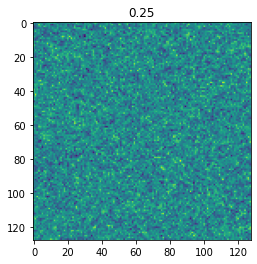

In [14]:
#Ploting
i = 1
plt.imshow(df_data['image'][i])
plt.title(df_data['class'][i])
plt.show()

# Zip File 📦

Creating a zip file with all the files stored here for future analyses.


In [25]:
# import os
# from datetime import datetime #you have probably already import that
# from zipfile import ZipFile
# from os.path import basename
# date = datetime.now().strftime('%Y-%m-%d')

# path = '/content'

# # create a ZipFile object
# with ZipFile(date+'_NOISE_files.zip', 'w') as zipObj:
#    # Iterate over all the files in directory
#    for folderName, subfolders, filenames in os.walk(path):
#        for filename in filenames:
#            #create complete filepath of file in directory
#            filePath = os.path.join(folderName, filename)
#            # Add file to zip
#            zipObj.write(filePath, basename(filePath))

/usr/lib/python3.7/zipfile.py:1506: UserWarning: Duplicate name: 'cNoise.py'
  return self._open_to_write(zinfo, force_zip64=force_zip64)


OSError: ignored